In [92]:
import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib import rc
import seaborn as sns
import os
# %matplotlib inline
# rc('text', usetex=True)
# %matplotlib widget
# sns.set()
import json
# plt.style.use('ggplot')
# plt.rcParamas[]
# plt.rcParams['figure.figsize'] = [11.8, 7]
# plt.rcParams["font.size"]=13
# plt.rcParams["font.weight"]="bold"
# print(plt.rcParams.keys())
# import mplcursors
# %matplotlib nbagg
# %pylab
# mplcursors.cursor(hover=True)
# sns.set_style("white")
s = json.load( open("custom.json"))  #edit path to json file\n",
plt.rcParams.update(s)

In [93]:
columns =['step', 'temp','press','pressGiga','vol','ke','pe','density']
# columns_ = ['step', 'temp','press','vol','ke','pe','density','cpu','cpuremain']
# def last_4chars(x):
#     return(x[-4:])

In [94]:
temp_heat = []; temp_cool =[]
vol_heat = []; vol_cool = []
for dirpath, dirnames, filenames in sorted(os.walk(os.getcwd())):
#for dirpath, dirnames, filenames in sorted(os.walk('Saroj')):
    filenames.sort()
    for file in sorted(filenames, key = len):
            if file.endswith('.txt'):
                if file.startswith('one_phase_heating'):
#                     print(file)
#                 display(file)
                    df = pd.read_csv(file, header=None, skiprows = 1, delimiter ="\s+" , names = columns)
                    temp_heat.append(df.temp.mean())
                    vol_heat.append(df.vol.mean())
#                     display(df.describe())
                else:
#                     print(file)
#                     if file.startswith('cool'):
                    df = pd.read_csv(file, header=None, skiprows = 1, delimiter ="\s+")
                    if df.shape[1] == 8:
                        df.columns = columns
                    else: 
                        df.columns = columns_
                    temp_cool.append(df.temp.mean()) 
                    
                    vol_cool.append(df.vol.mean())
#                     display(df.describe())
# df_bcc = pd.read_csv(file_bcc, header=None, skiprows = 0, delimiter ="\s+" , names = columns)
# mn_row_fcc = df_fcc[df_fcc["Cohesive Energy"]==df_fcc["Cohesive Energy"].min()]
# mn_row_bcc = df_bcc[df_bcc["Cohesive Energy"]==df_bcc["Cohesive Energy"].min()]

# print(float(mn_row["a"]))
# print(df.loc[df[df["Cohesive Energy"]==df["Cohesive Energy"].min()].index]["a"])
# cor = df.index.value()
# print(cor)
temp_heat.sort()
temp_cool.sort()
vol_heat.sort()
vol_cool.sort()

In [95]:
display(*zip(temp_heat,vol_heat))


(2097.9858388885586, 24252.61220587944)

(2203.3530230780016, 24380.457410789924)

(2301.292643019992, 24548.344951284333)

(2358.958209246233, 25603.78060602867)

(2410.108456733631, 25693.670422752297)

(2500.46469013813, 25816.687095776)

(2602.517011155172, 25955.895752571752)

In [96]:
display(*zip(temp_cool,vol_cool))

(1100.3474661835946, 23199.029968020255)

(1197.514468809316, 23291.91855645714)

(1292.7284207922814, 23422.145534186806)

(1355.4535366970363, 24124.121764366195)

(1398.0062598078214, 24189.63073439842)

(1503.7221600184887, 24353.960653650327)

(1601.593000488384, 24504.50201758383)

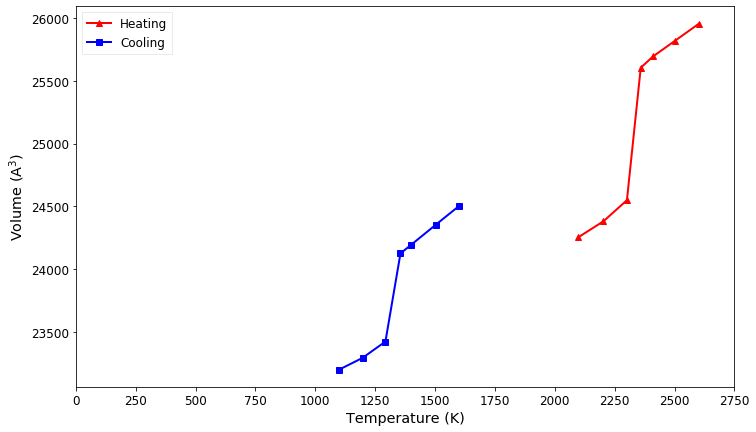

In [97]:
# temp.sort()
# vol.sort()
# %pylab
# print(temp)
plt.plot(temp_heat, vol_heat, color ="r", marker ="^", label="Heating")
plt.plot(temp_cool, vol_cool, color ="b", marker ="s",label="Cooling")
# plt.xlim([0,2800])
# plt.title('$Melting \;Temperature\; of\; Co=2100+1195-\sqrt{2100*1195} = 1710.86 K$')
# # plt.title(f'$\mu_P={df.iloc[df["Cohesive Energy"]]["a"]},E_c={df["Cohesive Energy"]}$')
# plt.xticks(range(0,2800,250),rotation=90)
plt.xticks(range(0,2800,250))
plt.ylabel("Volume (A$^3)$")
plt.xlabel("Temperature (K)")
# plt.tight_layout()
plt.legend()

# plt.annotate()
# plt.annotate()
# # plt.xticks(rotation=90)
# plt.annotate(r'T$_-= 1249 \;$K', xy=(1245, 24950),xytext=(700, 25800),color="black",
#             arrowprops=dict(arrowstyle="fancy",
# #                              ec="none",
# #                             patchB=el,
#                             connectionstyle="angle3,angleA=0,angleB=-90",color="b"));
# plt.annotate(r'T$_+=2102 \;$K', xy=(2100, 25180),xytext=(2250, 24100),color="black",
#             arrowprops=dict(arrowstyle="fancy",
# #                              ec="none",
# #                             patchB=el,
#                             connectionstyle="angle3,angleA=0,angleB=-90",color="r"));
# mplcursors.cursor(hover=True)
plt.savefig("onephase_volume.png",dpi=110)
plt.show()

In [98]:
#  	step 	temp 	press 	vol 	ke 	pe 	density
# count 	1.010000e+02 	101.000000 	101.000000 	101.000000 	101.000000 	101.000000 	101.000000
# mean 	4.100000e+06 	1302.393436 	-183.712991 	8987.367005 	115.318082 	-2796.943455 	5.430793
# std 	2.930017e+04 	40.154300 	5236.967495 	48.009311 	3.555390 	5.238488 	0.029002
# min 	4.050000e+06 	1218.653332 	-14633.214207 	8869.623325 	107.903465 	-2811.858675 	5.355323
# 25% 	4.075000e+06 	1267.681441 	-3996.367876 	8956.064004 	112.244570 	-2800.528772 	5.409587
# 50% 	4.100000e+06 	1308.265188 	712.416964 	8983.987137 	115.837985 	-2798.144637 	5.432683
# 75% 	4.125000e+06 	1328.003546 	3406.694788 	9022.342655 	117.585683 	-2792.967146 	5.449621
# max 	4.150000e+06 	1397.815601 	13368.865296 	9113.764764 	123.767065 	-2783.157257 	5.502731